[View in Colaboratory](https://colab.research.google.com/github/m-murphy/sketch-to-diagram/blob/master/generate_model.ipynb)

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import urllib.request

!rm -r data
!mkdir data

classes = ['circle', 'square', 'line', 'star', 'triangle']

In [0]:

def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    url = f"{base}{c}.npy"
    print(url)
    urllib.request.urlretrieve(url, f'data/{c}.npy')
    
def load_data(root, vfold_ratio=0.2, max_items_per_class=1000000):
  all_files = glob.glob(os.path.join(root, "*.npy"))
  
  x = np.empty([0, 784])
  y = np.empty([0])
  class_names = []
  
  for idx, file in enumerate(all_files):
    data = np.load(file)
    data = data[0: max_items_per_class, :]
    labels = np.full(data.shape[0], idx)
    
    x = np.concatenate((x, data), axis=0)
    y = np.append(y, labels)
    
    class_name, ext = os.path.splitext(os.path.basename(file))
    class_names.append(class_name)
    
  data = None
  labels = None
  
  permutation = np.random.permutation(y.shape[0])
  x = x[permutation, :]
  y = y[permutation]
  
  vfold_size = int(x.shape[0]/100 * (vfold_ratio * 100))
  
  x_test = x[0 : vfold_size, :]
  y_test = y[0 : vfold_size]
  
  x_train = x[vfold_size : x.shape[0], :]
  y_train = y[vfold_size : y.shape[0]]
  return x_train, y_train, x_test, y_test, class_names


In [43]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/circle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/square.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/line.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/star.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/triangle.npy


In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

line


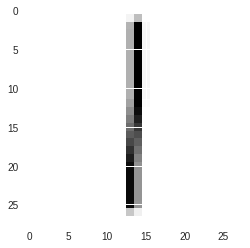

In [45]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28, 28))
print(class_names[int(y_train[idx].item())])

In [0]:
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [47]:
model = keras.Sequential()
model.add(layers.Convolution2D(32, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(num_classes, activation='softmax'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(128, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax')) 
# Train model
adam = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
print(model.summary())
tf.test.gpu_device_name()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout_36 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 6, 6, 128)         73856     
__________

'/device:GPU:0'

In [48]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 128, verbose=2, epochs=10)

Train on 469699 samples, validate on 52189 samples
Epoch 1/10
 - 67s - loss: 0.1039 - acc: 0.9697 - val_loss: 0.0745 - val_acc: 0.9783
Epoch 2/10
 - 65s - loss: 0.0757 - acc: 0.9783 - val_loss: 0.0701 - val_acc: 0.9793
Epoch 3/10
 - 65s - loss: 0.0702 - acc: 0.9797 - val_loss: 0.0679 - val_acc: 0.9800
Epoch 4/10
 - 65s - loss: 0.0670 - acc: 0.9804 - val_loss: 0.0663 - val_acc: 0.9806
Epoch 5/10
 - 65s - loss: 0.0654 - acc: 0.9811 - val_loss: 0.0645 - val_acc: 0.9813
Epoch 6/10
 - 65s - loss: 0.0637 - acc: 0.9814 - val_loss: 0.0656 - val_acc: 0.9808
Epoch 7/10
 - 65s - loss: 0.0617 - acc: 0.9818 - val_loss: 0.0655 - val_acc: 0.9811
Epoch 8/10
 - 65s - loss: 0.0609 - acc: 0.9822 - val_loss: 0.0646 - val_acc: 0.9807
Epoch 9/10
 - 65s - loss: 0.0596 - acc: 0.9826 - val_loss: 0.0640 - val_acc: 0.9815
Epoch 10/10
 - 65s - loss: 0.0584 - acc: 0.9829 - val_loss: 0.0696 - val_acc: 0.9805


In [49]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))


Test accuarcy: 98.06%


[2 4 3 0 1]
['line', 'square', 'circle', 'triangle', 'star']


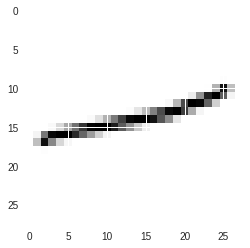

In [52]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
print((-pred).argsort()[:6])
ind = (-pred).argsort()[:6]
latex = [class_names[x] for x in ind]
print(latex)

In [53]:
import json

with open('class_names.json', 'w') as file_handler:
  class_name_dict = dict(enumerate(class_names))
  print(class_name_dict)
  file_handler.write(json.dumps(class_name_dict))
#     for item in class_names:
#         file_handler.write("{}\n".format(item))

{0: 'triangle', 1: 'star', 2: 'line', 3: 'circle', 4: 'square'}


In [26]:
!pip install tensorflowjs

In [54]:
model.save('keras.h5')

!rm -r model
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

!cp class_names.json model/class_names.json
!cp keras.h5 model/keras.h5
!zip -r model.zip model

Using TensorFlow backend.
updating: model/ (stored 0%)
updating: model/class_names.json (deflated 23%)
updating: model/keras.h5 (deflated 9%)
updating: model/group1-shard1of1 (deflated 4%)
updating: model/group2-shard1of1 (deflated 7%)
updating: model/group4-shard1of1 (deflated 7%)
updating: model/model.json (deflated 86%)
updating: model/group5-shard1of1 (deflated 7%)
updating: model/group3-shard1of1 (deflated 7%)
updating: model/group6-shard1of1 (deflated 6%)


In [0]:
from google.colab import files
files.download('model.zip')